# MNIST Dataset: Preparation, PCA, Clasfification


In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Warning - the source of the MNIST - library has changed!

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')


In [4]:
from sklearn.model_selection import train_test_split # Split into training and test
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)


In [5]:
train_img.shape #28x28 - images

(60000, 784)

In [6]:
train_lbl.shape

(60000,)

In [7]:
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img) # Scaling
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img) # Scaling
test_img = scaler.transform(test_img) # Scaling
copy_test_img = test_img # is saved for display, see below

In [8]:
train_img[0].shape # digit '4' at the 0-th position in the training data set as array

(784,)

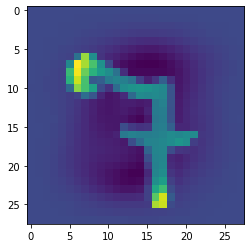

In [9]:
#Representation of the digit

import matplotlib.pyplot as plt
first_array=train_img[0].reshape(28,28)
plt.imshow(first_array)
plt.show()

In [10]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components=0.95) # The variance of the data must be more than 95%.
pca.fit(train_img)

PCA(n_components=0.95)

In [11]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [12]:
train_img.shape

(60000, 327)

In [13]:
from sklearn.linear_model import LogisticRegression 
logisticRegr = LogisticRegression(solver = 'lbfgs')  
logisticRegr.fit(train_img, train_lbl) # Logistic Regression - Model training (Labels start by 0 to 9)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[10].reshape(1,-1)) # transform in a matrix 1x330

array(['1'], dtype=object)

In [15]:
test_img[10].reshape(1,-1).shape

(1, 327)

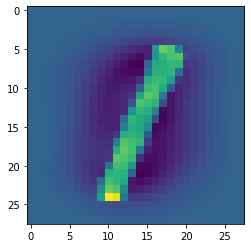

In [16]:
import matplotlib.pyplot as plt
first_array=copy_test_img[10].reshape(28,28)
plt.imshow(first_array)
plt.show()

In [17]:
# Predict for 10 images
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [18]:
# Predict for all in test
logisticRegr.predict(test_img)

array(['0', '4', '1', ..., '1', '3', '0'], dtype=object)

In [19]:
logisticRegr.score(test_img, test_lbl) #accuracy

0.9201

## Neural Network for MNIST Classification

In [20]:
from keras.models import Sequential
from keras.layers import Dense
X_train, X_test, Y_train, Y_test = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)


In [21]:
X_train.shape


(60000, 784)

In [22]:
Y_train.array

['7', '3', '0', '1', '2', ..., '7', '8', '7', '1', '1']
Length: 60000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [23]:
from sklearn.preprocessing import OneHotEncoder
### One hot encoding
Y_train_arr = Y_train.array.reshape(-1,1)
Y_test_arr = Y_test.array.reshape(-1,1)

onehot_encoder = OneHotEncoder(sparse=False)
onehot_Y_train = onehot_encoder.fit_transform(Y_train_arr)
onehot_Y_test = onehot_encoder.fit_transform(Y_test_arr)

print(onehot_Y_test)



[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [24]:
model = Sequential()
model.add(Dense(12, input_dim=784, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,onehot_Y_train, epochs=50, batch_size=100)
accuracy = model.evaluate(X_test, onehot_Y_test, verbose=0)

Epoch 1/50
600/600 [==============================] - 2s 3ms/step - loss: 2.4238 - accuracy: 0.2512
Epoch 2/50
600/600 [==============================] - 2s 3ms/step - loss: 1.6556 - accuracy: 0.3076
Epoch 3/50
600/600 [==============================] - 1s 2ms/step - loss: 1.4801 - accuracy: 0.3734
Epoch 4/50
600/600 [==============================] - 1s 2ms/step - loss: 1.2486 - accuracy: 0.4872
Epoch 5/50
600/600 [==============================] - 1s 2ms/step - loss: 1.1114 - accuracy: 0.5566
Epoch 6/50
600/600 [==============================] - 2s 3ms/step - loss: 1.0268 - accuracy: 0.5947
Epoch 7/50
600/600 [==============================] - 2s 3ms/step - loss: 0.9896 - accuracy: 0.6064
Epoch 8/50
600/600 [==============================] - 1s 2ms/step - loss: 0.9457 - accuracy: 0.6244
Epoch 9/50
600/600 [==============================] - 2s 3ms/step - loss: 0.8251 - accuracy: 0.6952
Epoch 10/50
600/600 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.7702

In [25]:
print(accuracy)

[0.315684050321579, 0.9230999946594238]


### Classification on PCA reduced data

In [26]:
from sklearn.preprocessing import StandardScaler
PCA_X_train, PCA_X_test, PCA_Y_train, PCA_Y_test = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(PCA_X_train)

# Apply transform to both the training set and the test set.
PCA_X_train = scaler.transform(PCA_X_train)
PCA_X_test = scaler.transform(PCA_X_test)

In [27]:
pca = PCA(.95)
pca.fit(PCA_X_train)
pca.n_components_

327

In [28]:
PCA_X_train = pca.transform(PCA_X_train)
PCA_X_test = pca.transform(PCA_X_test)

In [29]:
PCA_X_train.shape

(60000, 327)

In [39]:
PCA_Y_train.shape

(60000,)

In [40]:
onehot_Y_train.shape

(60000, 10)

In [30]:
model = Sequential()
model.add(Dense(12, input_dim=327, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(PCA_X_train,onehot_Y_train, epochs=50, batch_size=100)
accuracy = model.evaluate(PCA_X_test, onehot_Y_test, verbose=0)
print(accuracy)

Epoch 1/50
600/600 [==============================] - 2s 2ms/step - loss: 1.1498 - accuracy: 0.6483
Epoch 2/50
600/600 [==============================] - 1s 2ms/step - loss: 0.3654 - accuracy: 0.9007
Epoch 3/50
600/600 [==============================] - 1s 2ms/step - loss: 0.2845 - accuracy: 0.9198
Epoch 4/50
600/600 [==============================] - 1s 2ms/step - loss: 0.2531 - accuracy: 0.9282
Epoch 5/50
600/600 [==============================] - 1s 2ms/step - loss: 0.2353 - accuracy: 0.9320
Epoch 6/50
600/600 [==============================] - 1s 2ms/step - loss: 0.2210 - accuracy: 0.9358
Epoch 7/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2113 - accuracy: 0.9384
Epoch 8/50
600/600 [==============================] - 1s 2ms/step - loss: 0.2036 - accuracy: 0.9406
Epoch 9/50
600/600 [==============================] - 1s 2ms/step - loss: 0.1969 - accuracy: 0.9431
Epoch 10/50
600/600 [==============================] - 1s 2ms/step - loss: 0.1926 - accuracy: 0.9444

## The Diabetes Dataset contains data on various health factors of individuals and also the information whether or not they have diabietes. 

## In the following this dataset will be cleaned. Then Neural Network will be trained to predict whether a person has diabetes given some information of their medical history.

In [31]:
import pandas as pd
df = pd.read_csv("./data/diabetes.csv")

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
df.fillna(df.mean(), inplace = True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [32]:
features = df[["Glucose",'BMI','Age','DiabetesPedigreeFunction']]
labels = df.Outcome
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,stratify=df.Outcome,test_size=0.4)

In [33]:
features_train.shape

(460, 4)

In [34]:
features_test.shape

(308, 4)

In [37]:
print(labels_train)

153    0
557    0
188    1
522    0
182    0
      ..
579    1
52     0
546    1
48     1
391    1
Name: Outcome, Length: 460, dtype: int64


In [36]:
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(features_train,labels_train, epochs=150, batch_size=5)
accuracy = model.evaluate(features_test, labels_test, verbose=0)
print(accuracy)

Epoch 1/150
92/92 [==============================] - 1s 2ms/step - loss: 1.5772 - accuracy: 0.5043
Epoch 2/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4739
Epoch 3/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.6478
Epoch 4/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.6500
Epoch 5/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6500
Epoch 6/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.6500
Epoch 7/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6500
Epoch 8/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.6500
Epoch 9/150
92/92 [==============================] - 0s 4ms/step - loss: 0.6599 - accuracy: 0.6500
Epoch 10/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.6500
Epoch 11/

92/92 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.6500
Epoch 84/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6500
Epoch 85/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.6500
Epoch 86/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.6500
Epoch 87/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.6500
Epoch 88/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.6500
Epoch 89/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.6500
Epoch 90/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.6500
Epoch 91/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6500
Epoch 92/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6500
Epoch 93/150
